In [192]:
'''
************************************************
** COL774 Machine Learning
** Assignment 1: Least Squares Linear Regression
** Question 2
** @Author: Aman Bhardwaj
** @Entry No. 2019SIY7580
** @Date: 23 Jan 2020
************************************************
'''

import numpy as np
import pandas as pa
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sns
import time
'''
#Sample Training Dataset DTrain
#For given Theta coefficients [t0,t1,t2] = [3,1,2] (as per question) and x = [x0=1,x1,x2]
#Also for Gaussian noise epsilon (ep) and given Standard Deviation sqrt(2)
'''
def sampleData(n, theta, standDev):
    thetaArr = np.array(theta[1:])
    thetaMat = thetaArr.reshape(len(thetaArr),1) #Create Matrix of theta x 1
    l = len(thetaArr)
    
    x1 = np.random.normal(3, 2, n)
    x2 = np.random.normal(-1, 2, n)
    x = np.c_[x1,x2]
    ep = np.random.normal(0, standDev, n) #calculate noise values
    #sns.distplot(ep) #Plot PDF of ep Noise to show it is Gaussian Noise and follows Nornal Distribution
    #plt.xlabel("Gaussian Noise Value")
    #plt.ylabel("Density")
    #plt.title("PDF of Gaussian Noise added in Samples Generation")
    #plt.show()
    y = theta[0] + np.matmul(x,thetaMat).T + ep # y = (x*t)Transpose + noise(ep)
    return x,y


theta = [3,1,2] #for sampling
n = 1000000 #sample size
x,y = sampleData(n, theta, math.sqrt(2))
x = np.c_[np.ones(n),x]
x = x
y = y.T


----------Results---------
Batch Size: 1
Total Run Time: 0.23Sec 
Number of epoch over data: 0.014811
Learning Rate: 0.001
Final Parameters i.e. Theta values
Theta[0] 2.9318233774933407
Theta[1] 1.0108940147060694
Theta[2] 1.9906446823652668
Stopping Criteria: Difference in J(i) - J(i-1)<= Epsilon(ep). ep = ) 2.1e-05
Mean Square Error for Modeled Theta =  [1.99078244]
Mean Square Error for Original Theta[3,1,2] =  [1.96589384]
Difference in Error (predictError - OriginalError) [0.0248886]
----------------------------------


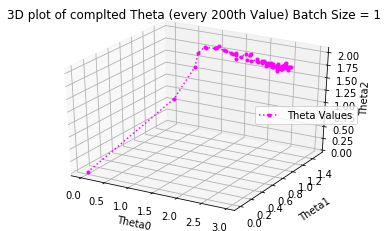

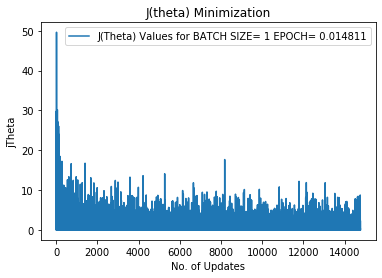

In [197]:
'''
Compute error function
params
xb: x batch
yb: y batch
t: theta parameters
bs: batch size
'''
def errorFunction(xb, yb, t, bs):
    error = yb - (xb @ t)
    sumOfLeastSquares = np.sum(error**2)
    errorFun = sumOfLeastSquares/(2*bs)
    return errorFun


'''
Compute SGD
params
ep: stopping criteria
maxIterations: maximum iterations
bs: Batch size
lr: learning rate
'''
def batchGradientDescent(ep, maxIterations, bs, lr):
    jThetaList = []
    jPrev = 0.0
    thetaList = []
    count = 0
    converge = False
    currentBatch = 0
    t = np.zeros((3,1))#as per instructions taking Theta0 = vector of 0s
    stime = time.time()
    while not converge and count < maxIterations:
        start = currentBatch*bs
        end = (currentBatch+1)*bs
        xb = x[start:end]
        yb = y[start:end]
        
        #compute gradient
        gradient = xb.T@(yb - (xb @ t))
        
        t = t + lr*(gradient/(bs))
        thetaList.append(t)
        count += 1
        currentBatch += 1
        currentBatch = currentBatch%totalBatches
        
        
        jTheta = errorFunction(xb, yb, t, bs)
        jThetaList.append(jTheta)
        
        #Stopping Criteria
        jDiff = abs(jPrev - jTheta) < ep

        if jDiff:
            converge = True
        jPrev = jTheta
    etime = time.time()
    runTime = etime - stime
    return jThetaList, thetaList, count, runTime


'''
report results in each case
params
i: no of iterations
t: theta params
ep: stopping criteria
rt: run time
mModel: Mean square error for learned model
mOrig: Mean square error for original model
'''
def reportResults(i, t, lr, ep, rt, mModel, mOrig):
    print("----------Results---------")
    print("Batch Size:", bSize)
    print("Total Run Time: {}Sec ".format(round(rt, 2)))
    print("Number of epoch over data:", i/totalBatches) 
    print("Learning Rate:", lr)
    print("Final Parameters i.e. Theta values")
    print("Theta[0]",t[0][0])
    print("Theta[1]",t[1][0])
    print("Theta[2]",t[2][0])
    print("Stopping Criteria: Difference in J(i) - J(i-1)<= Epsilon(ep). ep = )",ep)
    print("Mean Square Error for Modeled Theta = ", mModel)
    print("Mean Square Error for Original Theta[3,1,2] = ", mOrig)
    print("Difference in Error (predictError - OriginalError)", mModel - mOrig)
    print("----------------------------------")
    return

'''
plot jTheta values in each case
'''
def plotGradDescent(jTheta):
    fig = plt.figure(1)
    plt.plot(jTheta[50:], label="J(Theta) Values for BATCH SIZE= {} EPOCH= {}".format(bSize, itr/totalBatches))
    plt.xlabel("No. of Updates")
    plt.ylabel("jTheta")
    plt.title("J(theta) Minimization")
    plt.legend()
    plt.show()
    #fig.savefig("plots/q2_b_Batch={}.png".format(bSize), dpi= 300, pad_inches=0.1, format='png')
    return

'''
Compute Mean Squared test error
params
thetaParams: theta vector
'''
def computeTestError(thetaParam):
    testData = pa.read_csv('q2test.csv')
    
    xTest = np.c_[np.ones(10000), testData['X_1'], testData['X_2']]
    yTest = np.array(testData['Y']).reshape(10000,1)
    
    yPredict = np.array(np.dot(xTest, thetaParam)).reshape(10000, 1)
    
    yError = abs(yTest - yPredict)
    
    #Mean Sq. Error
    mError = float(0)
    for elem in yError:
        mError += (elem**2)
    mError = mError/ len(yError)
    #mError = np.sum(yError**2)/len(yError)
    
    return mError

'''
Plot J theta values on Mesh
'''
def plotJThetaMesh():
    
    #Plot Every 500th value
    n = len(thetaList)
    filterLen = round(n / 200)
    filteredList = []
    for i in range(filterLen):
        if(i*200 < n):
            filteredList.append(thetaList[(i*200)])
    filteredList.append(thetaList[-1])
    
    t0List = []
    t1List = []
    t2List = []
    for i in range(filterLen):
        t0List.append(filteredList[i][0][0]) 
        t1List.append(filteredList[i][1][0])
        t2List.append(filteredList[i][2][0])
        
    fig = plt.figure(2)
    ax = plt.axes(projection='3d')
    ax.plot(t0List, t1List, t2List, marker=".", linestyle='dotted', c="magenta", label="Theta Values")
    ax.set_xlabel("Theta0", labelpad=5)
    ax.set_ylabel("Theta1", labelpad=10)
    ax.set_zlabel("Theta2", labelpad=2)
    ax.set_title("3D plot of complted Theta (every 200th Value) Batch Size = {}".format(bSize))
    plt.legend(loc="center right")
    plt.show()
    #fig.savefig("plots/q2_d_Batch={}.png".format(bSize), dpi= 300, pad_inches=0.1, format='png')
    return

'''Main'''
if __name__ == '__main__':
    bSize = 1 #Batch Size
    LR = 0.001 #Learning Rate
    epsilon = 2.1e-5 #Stopping threshold
    totalBatches = round(n/bSize)
    jThetaList, thetaList, itr, runTime = batchGradientDescent(epsilon, 20000, bSize, LR)
    mErrorModel = computeTestError(thetaList[-1])
    mErrorOriginal = computeTestError(np.array(theta))
    reportResults(itr, thetaList[-1], LR, epsilon, runTime, mErrorModel, mErrorOriginal)
    plotJThetaMesh()
    plotGradDescent(jThetaList)
    


----------Results---------
Batch Size: 100
Total Run Time: 0.33Sec 
Number of epoch over data: 2.0
Learning Rate: 0.001
Final Parameters i.e. Theta values
Theta[0] 2.987854759450669
Theta[1] 1.0021688211937427
Theta[2] 2.0023862582053438
Stopping Criteria: Difference in J(i) - J(i-1)<= Epsilon(ep). ep = ) 1.1e-05
Mean Square Error for Modeled Theta =  [1.96630546]
Mean Square Error for Original Theta[3,1,2] =  [1.96589384]
Difference in Error (predictError - OriginalError) [0.00041162]
----------------------------------


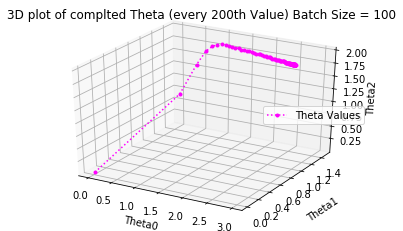

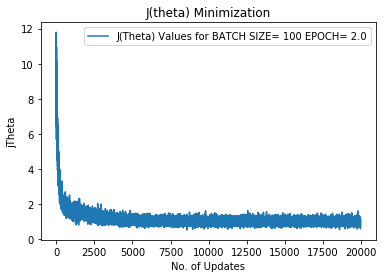

In [194]:
bSize = 100 #Batch Size
LR = 0.001 #Learning Rate
epsilon = 1.1e-5
totalBatches = round(n/bSize)
jThetaList, thetaList, itr, runTime = batchGradientDescent(epsilon, 20000, bSize, LR)
mErrorModel = computeTestError(thetaList[-1])
mErrorOriginal = computeTestError(np.array(theta))
reportResults(itr, thetaList[-1], LR, epsilon, runTime, mErrorModel, mErrorOriginal)
plotJThetaMesh()
plotGradDescent(jThetaList)

----------Results---------
Batch Size: 10000
Total Run Time: 2.62Sec 
Number of epoch over data: 200.0
Learning Rate: 0.001
Final Parameters i.e. Theta values
Theta[0] 2.987813051086349
Theta[1] 1.0030629356527994
Theta[2] 1.9992223496832995
Stopping Criteria: Difference in J(i) - J(i-1)<= Epsilon(ep). ep = ) 1.1e-07
Mean Square Error for Modeled Theta =  [1.96693886]
Mean Square Error for Original Theta[3,1,2] =  [1.96589384]
Difference in Error (predictError - OriginalError) [0.00104501]
----------------------------------


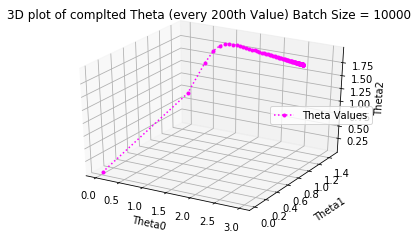

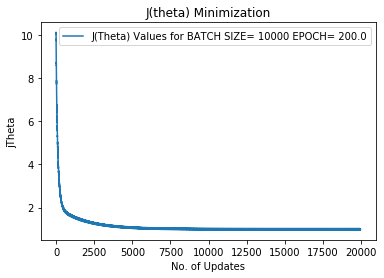

In [195]:
bSize = 10000 #Batch Size
LR = 0.001 #Learning Rate
epsilon = 1.1e-7
totalBatches = round(n/bSize)
jThetaList, thetaList, itr, runTime = batchGradientDescent(epsilon, 20000, bSize, LR)
mErrorModel = computeTestError(thetaList[-1])
mErrorOriginal = computeTestError(np.array(theta))
reportResults(itr, thetaList[-1], LR, epsilon, runTime, mErrorModel, mErrorOriginal)
plotJThetaMesh()
plotGradDescent(jThetaList)

----------Results---------
Batch Size: 1000000
Total Run Time: 269.78Sec 
Number of epoch over data: 11612.0
Learning Rate: 0.001
Final Parameters i.e. Theta values
Theta[0] 2.8809504782350537
Theta[1] 1.0264428327630841
Theta[2] 1.9912329531896353
Stopping Criteria: Difference in J(i) - J(i-1)<= Epsilon(ep). ep = ) 1.1e-06
Mean Square Error for Modeled Theta =  [2.05055261]
Mean Square Error for Original Theta[3,1,2] =  [1.96589384]
Difference in Error (predictError - OriginalError) [0.08465877]
----------------------------------


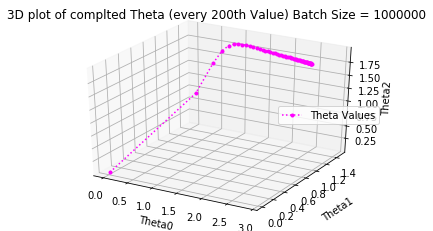

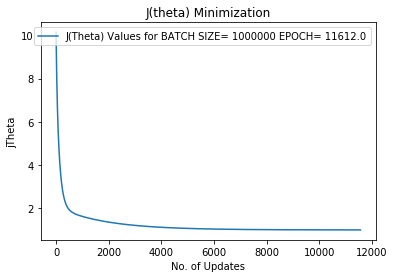

In [196]:
bSize = 1000000 #Batch Size
LR = 0.001 #Learning Rate
epsilon = 1.1e-6
totalBatches = round(n/bSize)
jThetaList, thetaList, itr, runTime = batchGradientDescent(epsilon, 20000, bSize, LR)
mErrorModel = computeTestError(thetaList[-1])
mErrorOriginal = computeTestError(np.array(theta))
reportResults(itr, thetaList[-1], LR, epsilon, runTime, mErrorModel, mErrorOriginal)
plotJThetaMesh()
plotGradDescent(jThetaList)